<image src="https://private-user-images.githubusercontent.com/105291217/331766287-4fd598b5-5574-4016-a9e0-91c5b79fda30.png?jwt=eyJhbGciOiJIUzI1NiIsInR5cCI6IkpXVCJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmF3LmdpdGh1YnVzZXJjb250ZW50LmNvbSIsImtleSI6ImtleTUiLCJleHAiOjE3MTYwMTEzNTIsIm5iZiI6MTcxNjAxMTA1MiwicGF0aCI6Ii8xMDUyOTEyMTcvMzMxNzY2Mjg3LTRmZDU5OGI1LTU1NzQtNDAxNi1hOWUwLTkxYzViNzlmZGEzMC5wbmc_WC1BbXotQWxnb3JpdGhtPUFXUzQtSE1BQy1TSEEyNTYmWC1BbXotQ3JlZGVudGlhbD1BS0lBVkNPRFlMU0E1M1BRSzRaQSUyRjIwMjQwNTE4JTJGdXMtZWFzdC0xJTJGczMlMkZhd3M0X3JlcXVlc3QmWC1BbXotRGF0ZT0yMDI0MDUxOFQwNTQ0MTJaJlgtQW16LUV4cGlyZXM9MzAwJlgtQW16LVNpZ25hdHVyZT1mNDY2ZDkyZDdjNmU1YmM3OWFlZjc2ZGUwZTNlZDljYzI3MTlhMmM1ZWQyOGVjOWZiNjMyNGFjODM4ODQ2NjI2JlgtQW16LVNpZ25lZEhlYWRlcnM9aG9zdCZhY3Rvcl9pZD0wJmtleV9pZD0wJnJlcG9faWQ9MCJ9.ydTioyxz227zlmy0FVopRTy_Q1kEI2ocbISoKuzdJbQ" width=100%>

Con PyTorch puedes aprovechar los últimos avances en inteligencia artificial para crear soluciones innovadoras para una amplia gama de aplicaciones, desde visión por computadora hasta procesamiento de lenguaje natural y más.

También cuenta con el respaldo de una comunidad vibrante y solidaria de desarrolladores e investigadores. Esto significa que tendrás acceso a una gran cantidad de recursos, herramientas y conocimientos que lo ayudarán a mantenerse a la vanguardia de la investigación y el desarrollo de IA.

Podrás apreciar cómo se ve un modelo relativamente sencillo. Sin embargo, esta siempre será la estructura de un modelo, no importa que sea de visión, transformers para procesamiento de lenguaje natural o reinforcement learning.

Debajo de todo eso, por más complicado que suene, hay un modelo de este tipo. Y es lo que marca la creación del **machine learning moderno.**


<div align="center"> <image src="https://raw.githubusercontent.com/ramiro999/pytorch-exploration/main/images/pytorch_workflow.png" width=800>  </div>

# **Introducción al Aprendizaje Profundo con CIFAR-10 y PyTorch**

## **Datos de prueba**


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

# Definición del modelo
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(MLP, self).__init__()
        # Primera capa oculta que aplica una transformación lineal
        self.fc1 = nn.Linear(input_size, hidden_size)
        # Función de activación ReLU
        self.relu = nn.ReLU()
        # Capa de salida que aplica otra transformación lineal
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        # Pasar la entrada por la primera capa, luego por ReLU
        out = self.fc1(x)
        out = self.relu(out)
        # Pasar por la capa de salida
        out = self.fc2(out)
        return out

# Establecer dimensiones
input_size = 20   # por ejemplo, tamaño de la entrada
hidden_size = 50  # número de neuronas en la capa oculta
num_classes = 3   # número de clases de salida para la clasificación

# Crear el modelo
model = MLP(input_size, hidden_size, num_classes)

# Definir la función de pérdida y el optimizador
criterion = nn.CrossEntropyLoss()  # Adecuado para clasificación multiclase
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Optimizador Adam

# Mostrar el modelo
print(model)


MLP(
  (fc1): Linear(in_features=20, out_features=50, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=50, out_features=3, bias=True)
)


In [2]:
import torch
from torch.utils.data import DataLoader, TensorDataset

# Simular datos de entrada
num_samples = 100
input_size = 20
num_classes = 3

# Generar datos aleatorios y etiquetas
x_data = torch.randn(num_samples, input_size)
y_labels = torch.randint(0, num_classes, (num_samples,))

# Crear un dataset y dataloader
dataset = TensorDataset(x_data, y_labels)
dataloader = DataLoader(dataset, batch_size=10, shuffle=True)


In [3]:
# Crear una instancia del modelo
model = MLP(input_size, hidden_size=50, num_classes=num_classes)

# Definir la función de pérdida y el optimizador
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [4]:
# Número de épocas
epochs = 5

# Bucle de entrenamiento
for epoch in range(epochs):
    for inputs, labels in dataloader:
        # Poner a cero los gradientes del optimizador
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)

        # Calcular la pérdida
        loss = criterion(outputs, labels)

        # Backpropagation
        loss.backward()

        # Actualizar los parámetros del modelo
        optimizer.step()

    print(f'Epoch {epoch+1}, Loss: {loss.item()}')


Epoch 1, Loss: 1.0384643077850342
Epoch 2, Loss: 0.9410896301269531
Epoch 3, Loss: 1.0232130289077759
Epoch 4, Loss: 1.0424506664276123
Epoch 5, Loss: 0.9094728231430054


In [5]:
# Generar datos de prueba
x_test = torch.randn(10, input_size)
y_test = torch.randint(0, num_classes, (10,))

# Evaluar el modelo
model.eval()  # Poner el modelo en modo de evaluación
with torch.no_grad():  # Desactivar el cálculo de gradientes
    predictions = model(x_test)
    predicted_classes = torch.argmax(predictions, axis=1)

# Mostrar las predicciones
print("Predicted classes:", predicted_classes)
print("True classes:", y_test)


Predicted classes: tensor([0, 2, 2, 0, 2, 2, 2, 2, 2, 2])
True classes: tensor([2, 1, 0, 2, 2, 0, 2, 1, 0, 1])


## **CIFAR-10**

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(MLP, self).__init__()
        self.flatten = nn.Flatten()  # Aplanar las imágenes de entrada
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = self.flatten(x)  # Aplanar las imágenes
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [7]:
# Transformaciones para los datos
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Cargar los conjuntos de datos de entrenamiento y prueba
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False)


100%|██████████| 170498071/170498071 [00:02<00:00, 73353533.90it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [8]:
input_size = 32 * 32 * 3  # Imágenes de 32x32 con 3 canales de color
hidden_size = 512  # Tamaño de la capa oculta
num_classes = 10  # 10 clases en CIFAR-10

model = MLP(input_size, hidden_size, num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [9]:
epochs = 10

for epoch in range(epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 200 == 199:    # imprimir cada 200 mini-lotes
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 200:.3f}')
            running_loss = 0.0

print('Finished Training')


Epoch 1, Batch 200, Loss: 1.817
Epoch 1, Batch 400, Loss: 1.658
Epoch 1, Batch 600, Loss: 1.587
Epoch 2, Batch 200, Loss: 1.492
Epoch 2, Batch 400, Loss: 1.481
Epoch 2, Batch 600, Loss: 1.469
Epoch 3, Batch 200, Loss: 1.390
Epoch 3, Batch 400, Loss: 1.387
Epoch 3, Batch 600, Loss: 1.387
Epoch 4, Batch 200, Loss: 1.285
Epoch 4, Batch 400, Loss: 1.325
Epoch 4, Batch 600, Loss: 1.321
Epoch 5, Batch 200, Loss: 1.230
Epoch 5, Batch 400, Loss: 1.242
Epoch 5, Batch 600, Loss: 1.256
Epoch 6, Batch 200, Loss: 1.167
Epoch 6, Batch 400, Loss: 1.171
Epoch 6, Batch 600, Loss: 1.203
Epoch 7, Batch 200, Loss: 1.075
Epoch 7, Batch 400, Loss: 1.135
Epoch 7, Batch 600, Loss: 1.176
Epoch 8, Batch 200, Loss: 1.057
Epoch 8, Batch 400, Loss: 1.093
Epoch 8, Batch 600, Loss: 1.074
Epoch 9, Batch 200, Loss: 1.000
Epoch 9, Batch 400, Loss: 1.028
Epoch 9, Batch 600, Loss: 1.038
Epoch 10, Batch 200, Loss: 0.939
Epoch 10, Batch 400, Loss: 0.992
Epoch 10, Batch 600, Loss: 1.005
Finished Training


In [10]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))


Accuracy of the network on the 10000 test images: 52 %


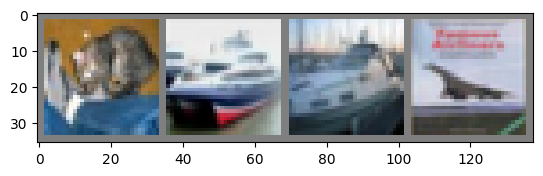

Labels:   cat  ship  ship airplane


In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Función para desnormalizar y mostrar la imagen
def imshow(img):
    img = img / 2 + 0.5  # desnormalizar
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))  # Convertir de Tensor a imagen
    plt.show()

# Obtener algunas imágenes aleatorias del conjunto de datos
dataiter = iter(testloader)
images, labels = dataiter.__next__()

# Mostrar imágenes
imshow(torchvision.utils.make_grid(images[:4]))
# Imprimir las etiquetas
print('Labels:', ' '.join('%5s' % testset.classes[labels[j]] for j in range(4)))
